#  1D Ising– Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

# ====== 1. 生成 Ising 数据 ======

In [2]:
def generate_ising_data(L=40, n_samples=5000, J=1.0):
    """
    生成 n_samples 个一维 Ising 配置及对应能量
    """
    X = np.random.choice([-1, 1], size=(n_samples, L))
    # 计算能量：E = -J * sum(s_i * s_{i+1})
    E = -J * np.sum(X[:, :-1] * X[:, 1:], axis=1)
    # 特征 = 每个 s_i*s_{i+1}
    features = X[:, :-1] * X[:, 1:]
    return features, E

# ====== 2. 定义误差函数 ======

In [3]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# ====== 3. 实验：不同模型 ======

In [4]:
L = 40
X, y = generate_ising_data(L=L, n_samples=5000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear": LinearRegression(),
    "Ridge λ=1": Ridge(alpha=1.0),
    "Ridge λ=10": Ridge(alpha=10.0),
    "Lasso λ=0.01": Lasso(alpha=0.01)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    E_train = mse(y_train, y_train_pred)
    E_test = mse(y_test, y_test_pred)
    results[name] = (E_train, E_test)
    print(f"{name:15s}  E_train={E_train:.4f}  E_test={E_test:.4f}")

Linear           E_train=0.0000  E_test=0.0000
Ridge λ=1        E_train=0.0000  E_test=0.0000
Ridge λ=10       E_train=0.0002  E_test=0.0003
Lasso λ=0.01     E_train=0.0039  E_test=0.0041


# ====== 4. 可视化 ======

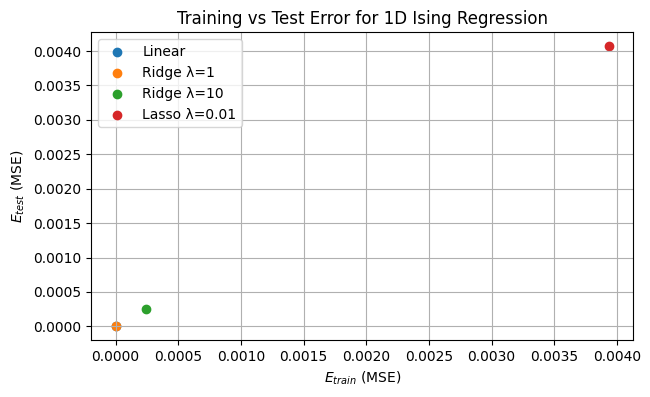

In [5]:
plt.figure(figsize=(7,4))
for name, (Etr, Ete) in results.items():
    plt.scatter(Etr, Ete, label=name)
plt.xlabel("$E_{train}$ (MSE)")
plt.ylabel("$E_{test}$ (MSE)")
plt.title("Training vs Test Error for 1D Ising Regression")
plt.legend()
plt.grid(True)
plt.show()

# 扩展：样本数变化的影响

n=   50  E_train=0.0712  E_test=3.0962
n=  100  E_train=0.0117  E_test=0.0609
n=  500  E_train=0.0003  E_test=0.0003
n= 1000  E_train=0.0001  E_test=0.0001
n= 5000  E_train=0.0000  E_test=0.0000
n=10000  E_train=0.0000  E_test=0.0000


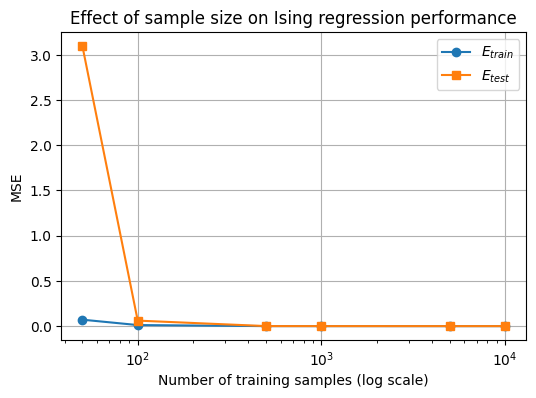

In [7]:
sample_sizes = [50, 100, 500, 1000, 5000, 10000]
Etr_list, Ete_list = [], []

for n in sample_sizes:
    X, y = generate_ising_data(L=L, n_samples=n)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    model = Ridge(alpha=1.0)
    model.fit(X_train, y_train)

    # ✅ 正确计算 MSE
    Etr = mse(y_train, model.predict(X_train))
    Ete = mse(y_test, model.predict(X_test))

    Etr_list.append(Etr)
    Ete_list.append(Ete)
    print(f"n={n:5d}  E_train={Etr:.4f}  E_test={Ete:.4f}")

# 可视化
plt.figure(figsize=(6,4))
plt.plot(sample_sizes, Etr_list, 'o-', label="$E_{train}$")
plt.plot(sample_sizes, Ete_list, 's-', label="$E_{test}$")
plt.xscale('log')
plt.xlabel("Number of training samples (log scale)")
plt.ylabel("MSE")
plt.title("Effect of sample size on Ising regression performance")
plt.legend()
plt.grid(True)
plt.show()

